In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('experiment1/metrics.csv')
df = pd.read_csv('metrics/ring_S_metrics.csv')
#df['size'] = df['Setting'].apply(lambda x: str(x[42]) + str(x[53]))
#df = df[df['size'] == '32']
df['Setting'] = df['Setting'].apply(lambda x: x.replace('-major_weight-1', ''))
df

,Setting,Seed,Modes,Major-Modes,Minor-Modes,HQS,Real-KL,Real-RKL,Real-JSD,Real-TVD,Uniform-KL,Uniform-RKL,Uniform-JSD,Uniform-TVD
0,-dataset-polar-d_layers-4-g_layers-4-d_alpha-1...,3,0,0.0,0.0,0.00000,6.781676,2.076327,0.495679,0.874720,6.781676,2.076327,0.495679,0.874720
1,-dataset-polar-d_layers-4-g_layers-4-d_alpha-1...,2,8,8.0,0.0,0.98532,0.018775,0.018726,0.004673,0.083453,0.018775,0.018726,0.004673,0.083453
2,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,8,8.0,0.0,0.82280,0.006027,0.005756,0.001470,0.039947,0.006027,0.005756,0.001470,0.039947
3,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,8,8.0,0.0,0.98384,0.007764,0.007664,0.001926,0.054223,0.007764,0.007664,0.001926,0.054223
4,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,2,0,0.0,0.0,0.00000,5.737985,1.555637,0.398123,0.749760,5.737985,1.555637,0.398123,0.749760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,199,8,8.0,0.0,0.98368,0.004078,0.004169,0.001030,0.028631,0.004078,0.004169,0.001030,0.028631
5394,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,6,6.0,0.0,0.97128,1.252293,0.285986,0.091763,0.246481,1.252293,0.285986,0.091763,0.246481
5395,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,7,7.0,0.0,0.88540,1.178694,0.337311,0.100865,0.337732,1.178694,0.337311,0.100865,0.337732
5396,-dataset-polar-d_layers-4-g_layers-4-d_alpha-0...,200,4,4.0,0.0,0.98548,3.679491,0.696151,0.215819,0.499840,3.679491,0.696151,0.215819,0.499840


In [13]:
types = ['Modes', 'Minor-Modes', 'HQS', 'Uniform-RKL', 'Reverse KL', 'JSD', 'TVD']
index = 0
rows = 1
means = df.groupby('Setting')[types[index]].mean().values.reshape(-1, rows).transpose().tolist()
stds = df.groupby('Setting')[types[index]].std().values.reshape(-1, rows).transpose().tolist()

indices = df.groupby('Setting')[types[index]].mean().index.values.reshape(-1, rows).transpose().tolist()
indices

[['-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.2-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.3-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.4-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.5-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.6-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1.1-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-d_alpha-0.7-g_alpha-1.2-epoch_step-400',
  '-dataset-polar-d_layers-4-g_layers-4-

In [15]:
count8s = df[df['Modes'] == 0].groupby('Setting')[types[index]].size().transpose()
sizes = df.groupby('Setting')[types[index]].size().transpose()

(count8s / sizes).tolist()

[0.035,
 0.02,
 0.055,
 0.045,
 0.07333333333333333,
 0.08666666666666667,
 0.045,
 0.08666666666666667,
 0.05333333333333334,
 0.06532663316582915,
 0.12666666666666668,
 0.08666666666666667,
 0.08040201005025126,
 0.12,
 0.12,
 0.16,
 0.13333333333333333,
 0.17333333333333334,
 0.295,
 0.26,
 0.31333333333333335]

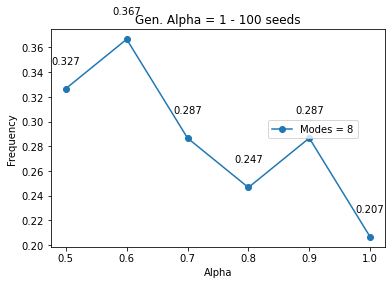

In [23]:
idx = [0,2,4,6,8,10]
#count0s = df[df['Modes'] == 0].groupby('Setting')[types[index]].size().transpose()[idx]
count8s = df[df['Modes'] == 8].groupby('Setting')[types[index]].size().transpose()[idx]
sizes = df.groupby('Setting')[types[index]].size().transpose()[idx]

#p0 = np.array((count0s / sizes).tolist())

#p0[np.isnan(p0)] = 0

p8 = np.array((count8s / sizes).tolist())
#pX = 1 - p0 - p8

alphas = [0.5,0.6,0.7,0.8,0.9,1]

#plt.plot(alphas, p0, marker='o', label='Modes = 0')

#for x,y in zip(alphas, p0):
    #plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')

plt.plot(alphas, p8, marker='o', label='Modes = 8')

for x,y in zip(alphas, p8):
    plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')
    
#plt.plot(alphas, pX, marker='o', label=r'Modes $\in$ (0,8)')

#for x,y in zip(alphas, pX):
    #plt.text(x, y+0.02, str(round(y * 1000) / 1000), ha='center')
    
plt.ylabel('Frequency')
plt.xlabel('Alpha')
plt.title('Gen. Alpha = 1 - 100 seeds')
plt.legend(loc=(0.65,0.5))
plt.show()

In [18]:
for m_row, s_row in zip(means, stds):
    for m, s in zip(m_row, s_row):
        s = 0 if pd.isnull(s) else s
        print("{:.2f}±{:.2f}".format(m, s), end=' ')
    print()

6.79±1.28 6.87±1.44 6.84±1.44 6.83±1.45 6.61±1.44 6.56±1.55 6.57±1.50 6.42±1.68 6.41±1.54 6.07±1.82 6.22±1.79 6.05±1.73 5.96±1.91 5.66±1.98 5.83±1.94 5.88±1.92 6.01±1.94 5.79±1.90 5.72±2.00 5.57±2.17 5.89±1.88 5.24±2.00 5.67±2.01 5.61±2.02 


In [19]:
fname1 = 'experiment1/data/-major_weight-1-dataset-polar-d_layers-4-g_layers-4-d_alpha-1-g_alpha-1-epoch_step-1-save_bursts-save_grads-seed-1_time-1666171574.366324'
fname2 = 'experiment1/data/-major_weight-1-dataset-polar-d_layers-4-g_layers-4-d_alpha-1-g_alpha-1-epoch_step-1-save_bursts-save_grads-seed-3_time-1666171567.8593686'

with open(fname1 + '/metrics.csv', 'r') as f:
    metrics = eval(f.read())

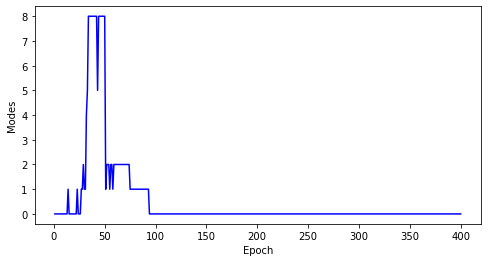

In [20]:
plt.figure(figsize=(8,4))
plt.plot(metrics['epochs'], metrics['modes'], color='blue')
plt.xlabel('Epoch')
plt.ylabel('Modes')
plt.show()

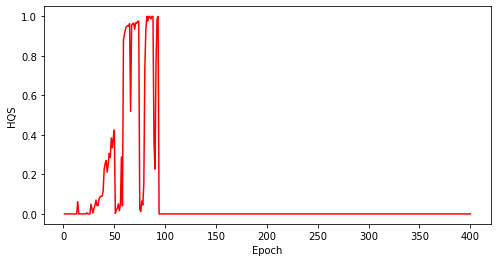

In [21]:
plt.figure(figsize=(8,4))
plt.plot(metrics['epochs'], metrics['hqs'], color='red')
plt.xlabel('Epoch')
plt.ylabel('HQS')
plt.show()

In [18]:
np.array(metrics['epochs'])[np.array(metrics['modes']) == 8]

array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120])

In [7]:
df = pd.read_csv('experiments/metrics.csv')
df.groupby('Setting')['0.0-1'].mean()

Setting
-n_epochs-50-g_lr-0.0005-g_alpha-1-d_alpha-0.8      753.208333
-n_epochs-50-g_lr-0.0005-g_alpha-1-d_alpha-0.9      749.187500
-n_epochs-50-g_lr-0.0005-g_alpha-1-d_alpha-1        740.000000
-n_epochs-50-g_lr-0.0005-g_alpha-1.2-d_alpha-0.8    723.229167
-n_epochs-50-g_lr-0.0005-g_alpha-1.2-d_alpha-0.9    718.562500
-n_epochs-50-g_lr-0.0005-g_alpha-1.2-d_alpha-1      717.729167
-n_epochs-50-g_lr-0.0005-g_alpha-1.5-d_alpha-0.8    757.893617
-n_epochs-50-g_lr-0.0005-g_alpha-1.5-d_alpha-0.9    733.255319
-n_epochs-50-g_lr-0.0005-g_alpha-1.5-d_alpha-1      741.361702
Name: 0.0-1, dtype: float64

In [14]:
df = pd.read_csv('metrics/mnist_metrics_lr.csv')
#data = np.array(df[df['0.5-1'] == 0].groupby('Setting')['0.5-1'].count()).reshape(-1,5)
#data
df[df['0.5-1'] == 0].groupby('Setting')['0.5-1'].count()

Setting
-non_saturating-n_epochs-50-g_lr-0.001-g_alpha-1      10
-non_saturating-n_epochs-50-g_lr-0.001-g_alpha-1.2     1
-non_saturating-n_epochs-50-g_lr-0.001-ls_gan         10
-non_saturating-n_epochs-50-g_lr-0.002-g_alpha-1      38
-non_saturating-n_epochs-50-g_lr-0.002-g_alpha-1.2     1
-non_saturating-n_epochs-50-g_lr-0.002-ls_gan         35
-non_saturating-n_epochs-50-g_lr-0.005-g_alpha-1      35
-non_saturating-n_epochs-50-g_lr-0.005-g_alpha-1.2     1
-non_saturating-n_epochs-50-g_lr-0.005-ls_gan         44
-non_saturating-n_epochs-50-g_lr-0.01-g_alpha-1       24
-non_saturating-n_epochs-50-g_lr-0.01-g_alpha-1.2      4
-non_saturating-n_epochs-50-g_lr-0.01-g_alpha-2        1
-non_saturating-n_epochs-50-g_lr-0.01-ls_gan          69
Name: 0.5-1, dtype: int64

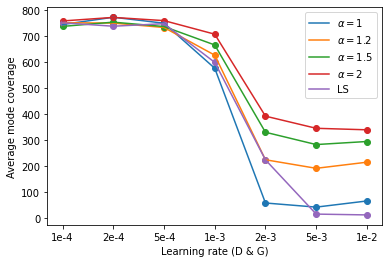

In [72]:
lrs = ['1e-4', '2e-4', '5e-4', '1e-3', '2e-3', '5e-3', '1e-2']
plt.plot(lrs, data[:,0], label=r'$\alpha = 1$')
plt.plot(lrs, data[:,1], label=r'$\alpha = 1.2$')
plt.plot(lrs, data[:,2], label=r'$\alpha = 1.5$')
plt.plot(lrs, data[:,3], label=r'$\alpha = 2$')
plt.plot(lrs, data[:,4], label=r'LS')
for i in range(5):
    plt.scatter(lrs, data[:,i])
plt.legend()
plt.xlabel('Learning rate (D & G)')
plt.ylabel('Average mode coverage')
plt.show()

In [8]:
df = pd.read_csv('metrics/mnist_metrics_epochs.csv')
data = np.array(df.groupby('Setting')['0.0-1'].mean()).reshape(-1,4)
data

array([[654.09677419, 696.4516129 , 691.51612903, 718.        ],
       [504.64516129, 550.58064516, 579.32258065, 677.74193548],
       [474.12      , 452.375     , 521.28571429, 612.61538462],
       [759.375     , 749.46875   , 732.875     , 754.59375   ]])

In [16]:
df[df['0.5-1'] == 0].groupby('Setting')['0.5-1'].count()

Setting
-non_saturating-n_epochs-100-g_lr-0.0005-g_alpha-1      2
-non_saturating-n_epochs-150-g_lr-0.0005-g_alpha-1      3
-non_saturating-n_epochs-150-g_lr-0.0005-g_alpha-1.2    1
-non_saturating-n_epochs-200-g_lr-0.0005-g_alpha-1      2
Name: 0.5-1, dtype: int64

In [14]:
def percentiles(array):
    array = np.array(array).astype(float)
    s_array = np.argsort(array)
    array[s_array] = np.linspace(1e-5,1 - 1e-5,len(array))
    return array

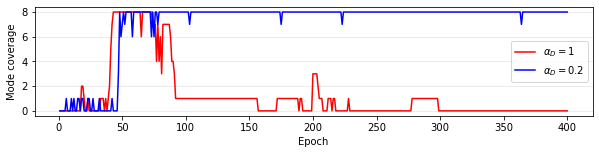

In [33]:
epochs = list(range(1,401))

seed8_vanilla = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 4, 7, 4, 6, 3, 7, 7, 7, 7, 7, 7, 6, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
seed8_alpha = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 8, 6, 7, 8, 7, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

plt.figure(figsize=(10,2))

plt.plot(epochs, seed8_vanilla, color='red', label=r'$\alpha_{D} = 1$')
plt.plot(epochs, seed8_alpha, color='blue', label=r'$\alpha_{D} = 0.2$')

plt.grid(axis='y', color=(0.9,0.9,0.9))
plt.ylabel('Mode coverage')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()



In [44]:
import os

with open('names.txt', 'r') as f:
    names = f.read().split('\n')

for name in names:
    os.system('mkdir experiment/data/' + name)
    os.system('touch experiment/data/' + name + 'metrics.csv')
    os.system('mkdir experiment/data/' + name + 'bursts')
    os.system('touch experiment/data/' + name + 'bursts/epoch-400.png')

mkdir: experiment/data/: File exists


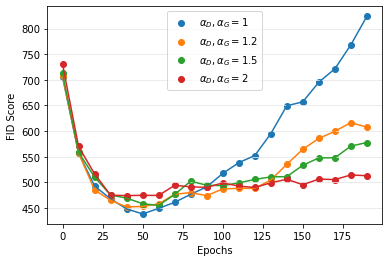

In [54]:
metric = 'FIDs'

data = []

for i in range(20):
    df = pd.read_csv('metrics/mnist_metrics_epochs_fid.csv')
    df[metric] = df[metric].apply(lambda x: eval(x)[i])
    data.append(list(df.groupby('Setting')[metric].mean()))

data = np.array(data)

epochs = [10*i for i in range(20)]

plt.grid(axis='y', color=(0.9,0.9,0.9))

plt.plot(epochs, data[:,0])
plt.plot(epochs, data[:,1])
plt.plot(epochs, data[:,2])
plt.plot(epochs, data[:,3])

plt.scatter(epochs, data[:,0], label=r'$\alpha_{D}, \alpha_{G} = 1$')
plt.scatter(epochs, data[:,1], label=r'$\alpha_{D}, \alpha_{G} = 1.2$')
plt.scatter(epochs, data[:,2], label=r'$\alpha_{D}, \alpha_{G} = 1.5$')
plt.scatter(epochs, data[:,3], label=r'$\alpha_{D}, \alpha_{G} = 2$')

plt.ylabel('FID Score')
plt.xlabel('Epochs')

plt.legend()
plt.show()

In [43]:
data

[[685.8484848484849, 712.2323232323232, 698.4489795918367, 693.0918367346939],
 [771.1919191919192, 799.2020202020202, 781.1020408163265, 776.3367346938776],
 [773.3838383838383, 763.6161616161617, 750.295918367347, 761.6428571428571],
 [745.4545454545455, 759.3434343434343, 743.265306122449, 745.3265306122449],
 [752.5555555555555, 751.4646464646464, 741.9489795918367, 736.0102040816327],
 [745.4545454545455, 739.5555555555555, 734.1224489795918, 729.9795918367347],
 [720.070707070707, 735.8888888888889, 723.9081632653061, 741.6836734693877],
 [697.2020202020202, 715.2424242424242, 702.7857142857143, 723.295918367347],
 [696.3232323232323, 693.2020202020202, 679.1836734693877, 713.4285714285714],
 [678.040404040404, 676.4848484848485, 675.6122448979592, 706.7244897959183],
 [653.5656565656566, 647.6363636363636, 668.765306122449, 689.4081632653061],
 [623.7373737373738, 628.030303030303, 656.2448979591836, 674.2244897959183],
 [611.1414141414141, 606.989898989899, 634.4285714285714, 6

In [64]:
def make_polar():

    means = [np.array([np.cos(2 * np.pi * i / 8), np.sin(2 * np.pi * i / 8)]) for i in range(1,9)]
    stds = [np.sqrt(1e-4)] * 8
    modes = list(zip(means, stds))

    probs = np.array([1 for m in range(8)])
    probs = list(probs / probs.sum())

    return modes, probs

def get_data(data_size, modes, probs):

    indices = np.random.choice(len(modes), data_size, p=probs)

    data = [modes[i][0] + modes[i][1] * np.random.randn(2) for i in indices]

    return data

modes, probs = make_polar()

data = get_data(25000, modes, probs)
data = np.concatenate([d.reshape(1,-1) for d in data], axis=0)

In [65]:
data.shape

(25000, 2)

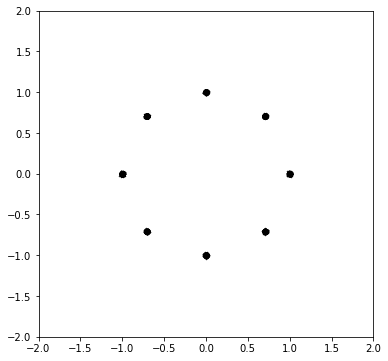

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], c=[(0,0,0)], s=0.2)
interval = [-2, 2]
plt.xlim(interval)
plt.ylim(interval)
plt.show()

In [70]:
import torch
from torchvision import datasets, transforms

def make_stacks(data, data_size):
    data = torch.concat(data, dim=0)
    stacked_data = data[torch.randint(data.shape[0], (data_size * 3,))]
    stacked_data = stacked_data.reshape(data_size, 3, data.shape[1], data.shape[2])
    return [stacked_data[i, :, :, :] for i in range(data_size)]

transform_data = transforms.Compose([transforms.ToTensor()])

data = [x for x, _ in list(datasets.MNIST('data', download=True, train=True, transform=transform_data))]
data = make_stacks(data, 3)

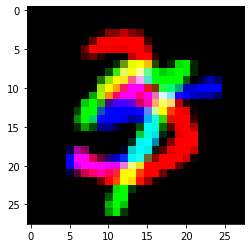

In [77]:
plt.imshow(np.array(data[2]).transpose(1,2,0))
plt.show()

In [74]:
data[0].shape

torch.Size([3, 28, 28])

In [19]:
g_alpha = 1
d_alpha = 1
df = pd.read_csv('metrics/metrics_monica.csv')
df = df[df['Setting'].apply(lambda x: len(x.split('g_alpha-')) > 1 and x.split('g_alpha-')[1].split('-')[0] == str(g_alpha))]
df = df[df['Setting'].apply(lambda x: len(x.split('d_alpha-')) > 1 and x.split('d_alpha-')[1].split('-')[0] == str(d_alpha))]
df.groupby('Setting').mean()

,Seed,FID Score,0.0-1,0.0-3,0.0-5,0.0-10,0.1-1,0.1-3,0.1-5,0.1-10,...,0.7-5,0.7-10,0.8-1,0.8-3,0.8-5,0.8-10,0.9-1,0.9-3,0.9-5,0.9-10
Setting,,,,,,,,,,,,,,,,,,,,,
-non_saturating-n_epochs-200-epoch_step-10-g_lr-0.0001-g_alpha-1-d_alpha-1-beta1-0.5-g_width-64-d_width-64,5.5,168.795435,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.9,9.2
-non_saturating-n_epochs-200-epoch_step-10-g_lr-0.0002-g_alpha-1-d_alpha-1-beta1-0.5-g_width-64-d_width-64,5.5,161.364833,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.8,9.1
-non_saturating-n_epochs-200-epoch_step-10-g_lr-0.0005-g_alpha-1-d_alpha-1-beta1-0.5-g_width-64-d_width-64,5.5,158.568338,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.3
-non_saturating-n_epochs-200-epoch_step-10-g_lr-0.001-g_alpha-1-d_alpha-1-beta1-0.5-g_width-64-d_width-64,5.5,160.242026,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.9,9.3


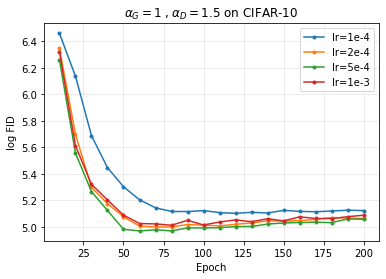

In [36]:
g_alpha = 1
d_alpha = 1.5
df = pd.read_csv('metrics/metrics_monica.csv')
#df = df[df['Setting'].apply(lambda x: 'model_width-8' in x)]
df = df[df['Setting'].apply(lambda x: len(x.split('g_alpha-')) > 1 and x.split('g_alpha-')[1].split('-')[0] == str(g_alpha))]
df = df[df['Setting'].apply(lambda x: len(x.split('d_alpha-')) > 1 and x.split('d_alpha-')[1].split('-')[0] == str(d_alpha))]

lrs = ['1e-4', '2e-4', '5e-4', '1e-3']

n = 20

data = np.zeros((len(lrs),n))

metric = 'FIDs'

for fid_i in range(n):

    df['FID_i'] = df[metric].apply(lambda x: eval(x)[fid_i])
    data[:,fid_i] = np.array(df.groupby('Setting').mean()['FID_i'])

lrs = ['1e-4', '2e-4', '5e-4', '1e-3']
#lrs = ['1e-4', '2e-4', '5e-4', '6e-4', '7e-4', '8e-4', '9e-4', '1e-3']
for i in range(len(lrs)):
    plt.plot([10*j for j in range(1,n+1)], np.log(data[i,:]), label='lr=' + lrs[i], marker='.')

plt.legend()
plt.title(r'$\alpha_{G} = ' + str(g_alpha) + r'$ $,\alpha_{D} = ' + str(d_alpha) + '$ on CIFAR-10')
plt.xlabel('Epoch')
plt.ylabel('log FID')
plt.grid( color=(0.9,0.9,0.9))
plt.show()